# A Deeper Dive into Dropout Rates
#### By: Samira Chatrathi

# Business Understanding


The New York State Education Department deems their mission as a government organization to supervise all public schools in New York, working to build the opportunity for all students within NY State regardless of their background. While this mission is lofty and seemingly holistic, bureaucratic factors tend to work against the schools themselves, focusing on superintendent promotion rather than the long term achievement of all students. In a study conducted by the NY Times, more than 120,000 students have left New York City public schools over the past five years. With the varying levels of COVID-19 surges across the state of NY state, educators and legislators need to focus on how they can improve communities with high dropout rates as well as understand what keeps a student engaged within a high school program and what doesn’t. I have tailored this project towards a member of the New York State Board of Education looking to understand which demographic factors are associated with higher high school dropout rates and which demographic factors are associated with lower dropout rates. Due to the sensitivity of these demographic factors this modeling process is for inferential purposes. The assumption that correlation is not equivalent to causation should be held throughout this modeling process and understanding. 

# Exploratory Data Analysis

I gathered data from the NYSED system over 3 different school years containing data from 5 separate calendar years. I was able to stack the demographics as well as the dropout rates associated with each column to see demographic trends associated with dropout rates. In this notebook, I will clean the data sets to focus specifically with the percentage variables. I will also focus on the target variable, percentage dropout and bin it into areas of low-risk, medium-risk, and high-risk. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [3]:
df = pd.read_csv('3yrdemstack') #load in master for demographic set


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154937 entries, 0 to 154936
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             154937 non-null  int64  
 1   Unnamed: 0.1           154937 non-null  int64  
 2   ENTITY_CD_x            154937 non-null  int64  
 3   ENTITY_NAME            154937 non-null  object 
 4   YEAR_x                 154937 non-null  int64  
 5   NUM_FREE_LUNCH         154937 non-null  int64  
 6   PER_FREE_LUNCH         154937 non-null  int64  
 7   NUM_REDUCED_LUNCH      154937 non-null  int64  
 8   PER_REDUCED_LUNCH      154937 non-null  int64  
 9   NUM_LEP                154937 non-null  int64  
 10  PER_LEP                154937 non-null  int64  
 11  NUM_AM_IND             154937 non-null  int64  
 12  PER_AM_IND             154937 non-null  int64  
 13  NUM_BLACK              154937 non-null  int64  
 14  PER_BLACK              154937 non-nu

In [5]:
df['YEAR_x'].value_counts()

2014    51877
2013    34466
2015    34086
2012    17419
2016    17089
Name: YEAR_x, dtype: int64

In [6]:
df['YEAR_y'].value_counts()

2014    51675
2015    34065
2013    34046
2012    18159
2016    16992
Name: YEAR_y, dtype: int64

# Cleaning Target Variable

In [7]:
df['PER_DROPOUT'].describe()

count     154401
unique       101
top            s
freq       71074
Name: PER_DROPOUT, dtype: object

In [8]:
df['PER_DROPOUT'].value_counts()

s     71074
01    15111
02    14626
03    11012
04     7767
      ...  
72        2
83        1
70        1
80        1
78        1
Name: PER_DROPOUT, Length: 101, dtype: int64

In [9]:
#code for sorting the values... input what you need inplace of this cell
df[df['PER_DROPOUT'] == 's']

,Unnamed: 0,Unnamed: 0.1,ENTITY_CD_x,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,...,ENTITY_CD_y,YEAR_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE
246,246,246,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2013,All Students,s,s,s,s,s,s,2694
247,247,247,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2013,General Education,s,s,s,s,s,s,2647
248,248,248,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2013,Students with Disabilities,s,s,s,s,s,s,47
249,249,249,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2014,All Students,s,s,s,s,s,s,2729
250,250,250,310300011485,"FIORELLO H LAGUARDIA HIGH SCHOOL OF MUSIC, ART...",2012,530,20,214,8,4,...,310300011485,2014,General Education,s,s,s,s,s,s,2663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154927,51330,51330,641001040001,HARTFORD CENTRAL SCHOOL,2014,125,27,29,6,0,...,641001040001,2014,General Education,s,s,s,s,s,s,136
154929,51332,51332,651201060003,SODUS HIGH SCHOOL,2014,91,26,29,8,6,...,651201060003,2014,General Education,s,s,s,s,s,s,299
154930,51333,51333,651201060003,SODUS HIGH SCHOOL,2014,91,26,29,8,6,...,651201060003,2014,Students with Disabilities,s,s,s,s,s,s,45
154932,51335,51335,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,General Education,s,s,s,s,s,s,621


In [10]:
df1 = df[df['PER_DROPOUT'] != 's'] #dropping the targets that are labeled as s instead
df1['PER_DROPOUT'].value_counts()

01    15111
02    14626
03    11012
04     7767
00     7134
      ...  
72        2
83        1
70        1
80        1
78        1
Name: PER_DROPOUT, Length: 100, dtype: int64

In [11]:
df1.dropna()

,Unnamed: 0,Unnamed: 0.1,ENTITY_CD_x,ENTITY_NAME,YEAR_x,NUM_FREE_LUNCH,PER_FREE_LUNCH,NUM_REDUCED_LUNCH,PER_REDUCED_LUNCH,NUM_LEP,...,ENTITY_CD_y,YEAR_y,SUBGROUP_NAME,DROPOUT,PER_DROPOUT,EQUIV,PER_EQUIV,TOTALNON,PER_TOTALNON,TOTAL_ENROLLMENT_BASE
0,0,0,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,All Students,13812,05,1209,00,15021,05,301043
1,1,1,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,General Education,10466,04,931,00,11397,05,247315
2,2,2,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2014,Students with Disabilities,3346,06,278,01,3624,07,53728
3,3,3,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,All Students,15431,05,1573,01,17004,05,311619
4,4,4,1,NYC Public Schools,2013,578885,60,64793,7,143664,...,1,2013,General Education,12792,05,1310,01,14102,05,258745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154928,51331,51331,651201060003,SODUS HIGH SCHOOL,2014,91,26,29,8,6,...,651201060003,2014,All Students,7,02,0,00,7,02,344
154931,51334,51334,662300010043,EARLY COLLEGE HIGH SCHOOL,2014,586,79,48,7,74,...,662300010043,2014,All Students,15,02,14,02,29,04,738
154934,51337,51337,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,All Students,61,35,3,02,64,37,174
154935,51338,51338,321000011660,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,2015,120,69,0,0,46,...,321000011660,2015,General Education,37,35,3,03,40,37,107


In [12]:
#focusing on my target variable that I will be using as a percentage val
df1['PER_DROPOUT'].dropna()


0         05
1         04
2         06
3         05
4         05
          ..
154928    02
154931    02
154934    35
154935    35
154936    36
Name: PER_DROPOUT, Length: 83327, dtype: object

In [13]:
print(df1[df1['PER_DROPOUT'].isnull()])

       Unnamed: 0  Unnamed: 0.1   ENTITY_CD_x  \
569           569           569  331700860879   
572           572           572  331700860879   
575           575           575  331700860879   
862           862           862  353100010072   
863           863           863  353100010072   
...           ...           ...           ...   
50691       50691         50691  321200011388   
50698       50698         50698  321200011388   
51362       51362         51362  580512030026   
51367       51367         51367  580512030026   
51372       51372         51372  580512030026   

                                            ENTITY_NAME  YEAR_x  \
569      ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL    2012   
572      ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL    2013   
575      ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL    2014   
862                                  IS 72 ROCCO LAURIE    2012   
863                                  IS 72 ROCCO LAURIE    2012   
...      

In [14]:
df1['PER_DROPOUT'] = pd.to_numeric(df1['PER_DROPOUT'], errors='coerce')

<ipython-input-14-00742d92beb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PER_DROPOUT'] = pd.to_numeric(df1['PER_DROPOUT'], errors='coerce')


In [15]:
df1 = df1.dropna(subset=['PER_DROPOUT'])

In [16]:
df1['PER_DROPOUT'] = df1['PER_DROPOUT'].astype(int)

## Binning Target Variable

In [17]:
df1['PER_DROPOUT'].describe()

count    83327.000000
mean         5.938663
std         22.980267
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1400.000000
Name: PER_DROPOUT, dtype: float64

In [18]:
#Creating Risk Level Bin
#While risk level is spaced out on different tiers, I wanted to make it representative of the data that we have here

df1['RiskLevel'] = pd.cut(x=df1['PER_DROPOUT'],
                     bins=[0, 3, 8, 100],
                     labels=['Low-Risk', 'Mid-Risk', 'High-Risk'])



In [19]:
df1['RiskLevel'].value_counts() #reassess for class imbalance

Low-Risk     40749
Mid-Risk     23623
High-Risk    11693
Name: RiskLevel, dtype: int64

In [20]:
#code for droppin non useful columns
df1 =df1.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'ENTITY_CD_x', 'YEAR_y'])


In [21]:
#new data frame for columns I want to keep
columns = ['ENTITY_NAME', 'PER_FREE_LUNCH', 'PER_LEP', 'PER_AM_IND', 'PER_BLACK', 'PER_HISP', 'PER_ASIAN', 'PER_WHITE', 'PER_Multi', 'PER_FEMALE', 'PER_MALE', 'PER_ECDIS', 'PER_EQUIV', 'PER_TOTALNON', 'RiskLevel']

df2 = df1[columns]

In [22]:
#np.nan_to_num(df2) 

In [23]:
df2

,ENTITY_NAME,PER_FREE_LUNCH,PER_LEP,PER_AM_IND,PER_BLACK,PER_HISP,PER_ASIAN,PER_WHITE,PER_Multi,PER_FEMALE,PER_MALE,PER_ECDIS,PER_EQUIV,PER_TOTALNON,RiskLevel
0,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,00,05,Mid-Risk
1,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,00,05,Mid-Risk
2,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,01,07,Mid-Risk
3,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,01,05,Mid-Risk
4,NYC Public Schools,60,15,1,27,40,16,15,1,49.0,51.0,81.0,01,05,Mid-Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154928,SODUS HIGH SCHOOL,26,2,0,14,12,0,70,4,49.0,51.0,45.0,00,02,Low-Risk
154931,EARLY COLLEGE HIGH SCHOOL,79,10,0,34,49,4,11,1,47.0,53.0,87.0,02,04,Low-Risk
154934,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,69,26,0,20,76,2,2,0,56.0,44.0,69.0,02,37,High-Risk
154935,GRACE DODGE CAREER AND TECHNICAL HIGH SCHOOL,69,26,0,20,76,2,2,0,56.0,44.0,69.0,03,37,High-Risk


# Dealing with Null Rows

In [24]:
print(df2[df2.isnull()])

       ENTITY_NAME  PER_FREE_LUNCH  PER_LEP  PER_AM_IND  PER_BLACK  PER_HISP  \
0              NaN             NaN      NaN         NaN        NaN       NaN   
1              NaN             NaN      NaN         NaN        NaN       NaN   
2              NaN             NaN      NaN         NaN        NaN       NaN   
3              NaN             NaN      NaN         NaN        NaN       NaN   
4              NaN             NaN      NaN         NaN        NaN       NaN   
...            ...             ...      ...         ...        ...       ...   
154928         NaN             NaN      NaN         NaN        NaN       NaN   
154931         NaN             NaN      NaN         NaN        NaN       NaN   
154934         NaN             NaN      NaN         NaN        NaN       NaN   
154935         NaN             NaN      NaN         NaN        NaN       NaN   
154936         NaN             NaN      NaN         NaN        NaN       NaN   

        PER_ASIAN  PER_WHITE  PER_Multi

In [25]:
for col in df2.columns:
    # Select the column by name and get count of unique values in it
    count = df2[col].isna().sum()
    print(f'Count of na values in Column "{col}" is: {count}')

Count of na values in Column "ENTITY_NAME" is: 0
Count of na values in Column "PER_FREE_LUNCH" is: 0
Count of na values in Column "PER_LEP" is: 0
Count of na values in Column "PER_AM_IND" is: 0
Count of na values in Column "PER_BLACK" is: 0
Count of na values in Column "PER_HISP" is: 0
Count of na values in Column "PER_ASIAN" is: 0
Count of na values in Column "PER_WHITE" is: 0
Count of na values in Column "PER_Multi" is: 0
Count of na values in Column "PER_FEMALE" is: 11525
Count of na values in Column "PER_MALE" is: 11525
Count of na values in Column "PER_ECDIS" is: 11525
Count of na values in Column "PER_EQUIV" is: 0
Count of na values in Column "PER_TOTALNON" is: 0
Count of na values in Column "RiskLevel" is: 7262


In [26]:
#for row in df2.rows:
    # Select the column by name and get count of unique values in it
    #count = df2[row].nunique()
    #print(f'Count of Unique values in Column "{col}" is: {count}')

In [27]:
#anywhere that there is a missing value then we can drop from data frame and only keep obs that are complete



In [28]:
subset = df2[df2.isnull().any(axis=1)]

In [29]:
df2.dropna(axis=0, how='any',thresh=None, subset=None, inplace=True)

<ipython-input-29-7ad13926227d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0, how='any',thresh=None, subset=None, inplace=True)


In [30]:
df2.to_csv(path_or_buf = "master_df", header=True)

In [31]:
df2['RiskLevel'].value_counts()


Low-Risk     35337
Mid-Risk     20661
High-Risk    10200
Name: RiskLevel, dtype: int64

/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

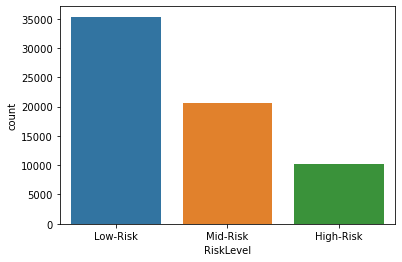

In [32]:
sns.countplot(df2['RiskLevel'])


# Dummy Classifier/Baseline



Since I am implementing a classification model, I will be using a Dummy classifier as my baseline model. Our classification metric is precision. It is important to consider the meaning of precision in this case and why it would be the most productive for this project. Precision encompasses the false positive rate, potentially marking a school high-risk when they are not. This would be a more important factor for two reasons. First, if we marked a school as high-risk for dropout when it isn't it would be better than leaving schools that are high risk un evaluated. Second, our ability to go and see which schools are low-risk will allow us to see which aspects of the school are productive and are leading to these lower levels of drop out rates. 

In [33]:

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


df = pd.read_csv('master_df')


In [34]:
#separating interested columns out into new dataframe
demographics = ['PER_FREE_LUNCH', 'PER_LEP', 'PER_AM_IND', 'PER_BLACK', 'PER_HISP', 'PER_ASIAN', 'PER_WHITE', 'PER_Multi', 'PER_FEMALE', 'PER_MALE', 'PER_ECDIS', 'RiskLevel']

df_dem = df[demographics]


In [35]:
# Performing test-train split
y = df_dem['RiskLevel']
X = df_dem.drop(columns = ['RiskLevel'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



In [36]:
# Performing dummy classification
dem_clf = DummyClassifier(strategy="most_frequent")
dem_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent');

In [37]:
# Scoring dummy classifier

print(f'Our dummy classifier has a precision of: \
      {round(precision_score(y_train, dem_clf.predict(X_train), average = "weighted", zero_division=0),3)*100}%')

Our dummy classifier has a precision of:       28.599999999999998%


# One Hot Encode and Decision Tree

Undoubtedly, we must one hot encode, so that we have binary values. After we one hot encode, we can see which features are the most important to keep in our simple logistic regression with our decision tree. 

In [38]:
# Import relevant libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [39]:
# Encode the X_train and X_test dataframes
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

# Encode train set
X_train_ohe1 = ohe.fit_transform(X_train)
X_train_ohe = pd.DataFrame(X_train_ohe1)
X_train_ohe.columns = ohe.get_feature_names(X_train.columns)

# Encode train set
X_test_ohe1 = ohe.transform(X_test)
X_test_ohe = pd.DataFrame(X_test_ohe1)
X_test_ohe.columns = ohe.get_feature_names(X_test.columns)

In [40]:
# Decision tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

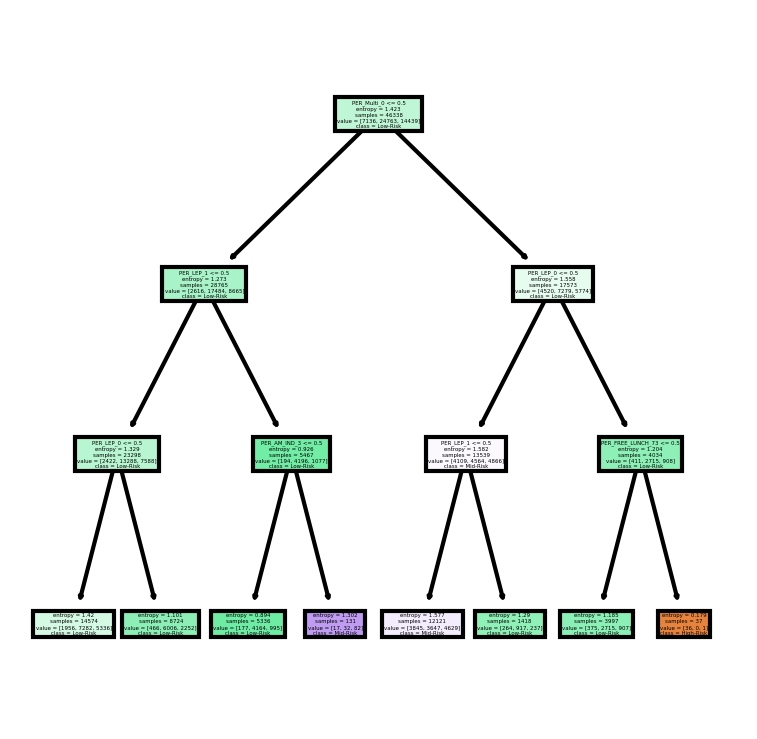

In [41]:


fig, axes = plot.subplots(nrows = 1,ncols =1 , figsize = (3,3), dpi=300)
plot_tree(clf,
               feature_names = X_train_ohe.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plot.show()

## Decision Tree Results

#### Top 4 Features (all within the class low-risk)

- Percentage of Multiracial Students
- Percentage of Limited English Proficient Students
- Percentage of American Indian or Alaskan Native Students
- Percentage of Students Eligible for Free Lunch


# First Simple Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Column selection
log_cols1 = ['PER_Multi', 'PER_FREE_LUNCH', 'PER_LEP', 'PER_AM_IND']

logx_train = X_train[log_cols1]
logx_test = X_test[log_cols1]

In [44]:
# Encoding new frames
x_train_ohe1 = ohe.fit_transform(logx_train)
x_train_ohe = pd.DataFrame(x_train_ohe1)
x_train_ohe.columns = ohe.get_feature_names(logx_train.columns)

x_test_ohe1 = ohe.transform(logx_test)
x_test_ohe = pd.DataFrame(x_test_ohe1)
x_test_ohe.columns = ohe.get_feature_names(logx_test.columns)

In [45]:
# Instantiate and perform logistic regression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

logreg.fit(x_train_ohe, y_train)

print(f"Training precision: \
      {round(precision_score(y_train, logreg.predict(x_train_ohe), average='weighted', zero_division=0),4)*100}%")
print(f"Test precision: \
      {round(precision_score(y_test, logreg.predict(x_test_ohe), average='weighted', zero_division=0),4)*100}%")


Training precision:       62.56%
Test precision:       61.83%


Let's consider adding the gender category within our predictor variables to see if it helps increase our precision score.

In [46]:
# Column selection
log_cols2 = ['PER_MALE', 'PER_FEMALE', 'PER_Multi', 'PER_LEP', 'PER_AM_IND', 'PER_FREE_LUNCH']

logx_train = X_train[log_cols2]
logx_test = X_test[log_cols2]

In [47]:
# Encoding new frames
x_train_ohe1 = ohe.fit_transform(logx_train)
x_train_ohe = pd.DataFrame(x_train_ohe1)
x_train_ohe.columns = ohe.get_feature_names(logx_train.columns)

x_test_ohe1 = ohe.transform(logx_test)
x_test_ohe = pd.DataFrame(x_test_ohe1)
x_test_ohe.columns = ohe.get_feature_names(logx_test.columns)

In [48]:
# Instantiate and perform logistic regression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

logreg.fit(x_train_ohe, y_train)

print(f"Training precision: \
      {round(precision_score(y_train, logreg.predict(x_train_ohe), average='weighted', zero_division=0),4)*100}%")
print(f"Test precision: \
      {round(precision_score(y_test, logreg.predict(x_test_ohe), average='weighted', zero_division=0),4)*100}%")


Training precision:       63.72%
Test precision:       62.96000000000001%


Although our logistic regression model increases our precision, we still have ways to go. It is important to consider a different model type as a means of moving forward and improving precison.

# KNN Model

Now that we have a baseline model with training and test precision of 63.72% and 62.96% respectively, we can now move to different iterations of our model where we increase our precision. Let's begin with a K Nearest Neighbors Model (KNN). KNN is a supervised classifciation algorithm that allows to see how sinilar a data point is to the surrounding data points' predicted outcome.

In [49]:
# Import relevant libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [50]:
# Perform default KNN
knn = KNeighborsClassifier()

knn.fit(x_train_ohe, y_train)
print(f"Training precision: \
      {round(precision_score(y_train, knn.predict(x_train_ohe), average='weighted', zero_division=0),2)*100}%")
print(f"Test precision: \
      {round(precision_score(y_test, knn.predict(x_test_ohe), average='weighted', zero_division=0),2)*100}%")

Training precision:       75.0%
Test precision:       71.0%


Now that we have increased our precision to 72%, we can look to see which hyperparameters we can tune to get an even more accurate model. In this case we will use a K-fold to determine the best n_neighbors. 

In [51]:
# Kfold to determine best n_neighbors

kf = KFold(n_splits=2)

k_scores_train = {}
k_scores_val = {}


for k in range(10, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    precision_score_t = []
    precision_score_v = []
    for train_ind, val_ind in kf.split(X_train, y_train):
        
        X_tb, y_tb = X_train.iloc[train_ind], y_train.iloc[train_ind] 
        X_vb, y_vb = X_train.iloc[val_ind], y_train.iloc[val_ind]
        
        X_t_ind = X_tb.index
        X_v_ind = X_vb.index
        
        X_tb = pd.DataFrame(ohe.fit_transform(X_tb))
        X_tb.index = X_t_ind
        X_vb = pd.DataFrame(ohe.transform(X_vb))
        X_vb.index = X_v_ind
        
        knn.fit(X_tb, y_tb)
        
        y_pred_tb = knn.predict(X_tb)
        y_pred_vb = knn.predict(X_vb)
        
        precision_score_t.append(precision_score(y_tb, y_pred_tb, average='weighted', zero_division=0))
        precision_score_v.append(precision_score(y_vb, y_pred_vb, average='weighted', zero_division=0))
        
        
    k_scores_train[k] = np.mean(precision_score_t)
    k_scores_val[k] = np.mean(precision_score_v)

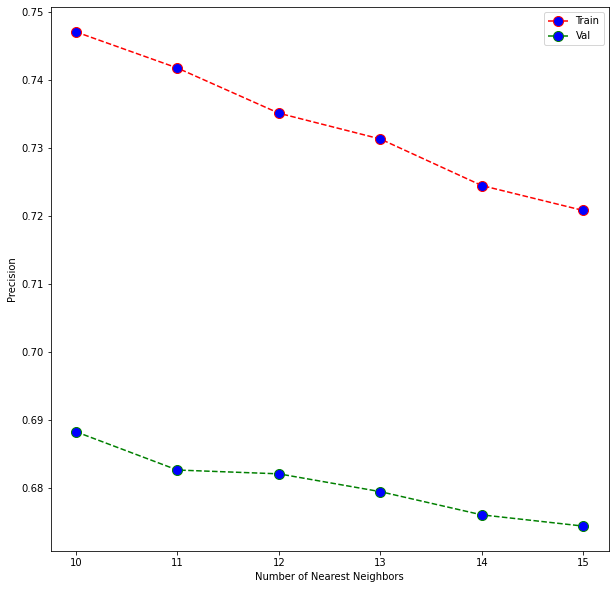

In [52]:
# displaying k-fold results
fig, ax = plot.subplots(figsize=(10, 10))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),
        color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()),
        color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('Number of Nearest Neighbors')
ax.set_ylabel('Precision')
plot.legend();

In [53]:
# iterated version
knn = KNeighborsClassifier(n_neighbors=10, n_jobs = -1)

knn.fit(x_train_ohe, y_train)
print(f"Training precision: \
      {round(precision_score(y_train, knn.predict(x_train_ohe), average='weighted', zero_division=0),2)*100}%")
print(f"Test precision: \
      {round(precision_score(y_test, knn.predict(x_test_ohe), average='weighted', zero_division=0),2)*100}%")



Training precision:       75.0%
Test precision:       71.0%


As shown above, I decided to tune the hyperparameter, number of nearest neighbors, to equal 10. This increased the training and test precision to 71%. This is 1% higher than the default level before.  

In [54]:
# iterated version
knn = KNeighborsClassifier(n_neighbors=10, n_jobs = -1, leaf_size = 3, p =1)

knn.fit(x_train_ohe, y_train)
print(f"Training precision: \
      {round(precision_score(y_train, knn.predict(x_train_ohe), average='weighted', zero_division=0),2)*100}%")
print(f"Test precision: \
      {round(precision_score(y_test, knn.predict(x_test_ohe), average='weighted', zero_division=0),2)*100}%")

Training precision:       75.0%
Test precision:       71.0%


In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = [3,5,10,15]
n_neighbors = [3,5,7,10]
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier(n_jobs = -1)
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train_ohe ,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

## Conclusion
This modeling project is just the beginning to the long and iterative process of helping the education system. As we work as a community to support students from all backgrounds we should consider more factors that would potentially effect the direction of students in the public school system. I have three main considerations for future research:

1. Iterate this initial model by incorporating a mental health feature that determines the status of overall mental health for students within the school.
2. Implement the High School Risk Survey that examines risk behaviors such as smoking, alcohol/drug use, and eating disorders.
3. Monitor changes in dropout rates compared to that of an online learning environment

Ultimately, in this classification modeling process, I was able to reach 75% precision in the model at predicting which dropout risk-level a student would be based on a wide-array of demographic factors. I hope to continue this process to further understand the complexity of a student's experience in the American education system.